In [1]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 4.3.3"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
# data
data = read.csv("Comprehensive_Banking_Database.csv")
head(data)

,Customer.ID,First.Name,Last.Name,Age,Gender,Address,City,Contact.Number,Email,Account.Type,⋯,Minimum.Payment.Due,Payment.Due.Date,Last.Credit.Card.Payment.Date,Rewards.Points,Feedback.ID,Feedback.Date,Feedback.Type,Resolution.Status,Resolution.Date,Anomaly
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,1,Joshua,Hall,45,Male,Address_1,Fort Worth,19458794854,joshua.hall@kag.com,Current,⋯,226.22,11/26/2023,3/20/2023,8142,1,10/6/2023,Suggestion,Resolved,1/22/2023,1
2,2,Mark,Taylor,47,Female,Address_2,Louisville,19458794855,mark.taylor@kag.com,Current,⋯,42.84,11/5/2023,6/16/2023,4306,2,4/7/2023,Complaint,Resolved,8/27/2023,1
3,3,Joseph,Flores,25,Female,Address_3,Philadelphia,19458794856,joseph.flores@kag.com,Current,⋯,162.12,1/8/2023,3/20/2023,4842,3,9/7/2023,Praise,Pending,5/11/2023,1
4,4,Kevin,Lee,52,Other,Address_4,Oklahoma City,19458794857,kevin.lee@kag.com,Savings,⋯,216.46,9/8/2023,10/15/2023,9463,4,5/28/2023,Complaint,Resolved,7/5/2023,1
5,5,Linda,Johnson,68,Other,Address_5,Phoenix,19458794858,linda.johnson@kag.com,Savings,⋯,1.29,3/4/2023,7/27/2023,2209,5,2/12/2023,Complaint,Resolved,11/21/2023,1
6,6,Charles,Torres,52,Male,Address_6,El Paso,19458794859,charles.torres@kag.com,Savings,⋯,66.59,5/13/2023,11/16/2023,478,6,8/6/2023,Praise,Resolved,7/23/2023,1


In [17]:
# firt row in long format
data[1,] %>% gather(key = "variable", value = "value") %>% filter(!is.na(value))

variable,value
<chr>,<chr>
Customer.ID,1
First.Name,Joshua
Last.Name,Hall
Age,45
Gender,Male
Address,Address_1
City,Fort Worth
Contact.Number,19458794854
Email,joshua.hall@kag.com


In [ ]:
# processing 
data$Transaction.Date = as.Date(data$Transaction.Date, format = "%m/%d/%Y")
data$Transaction.EOM = as.Date(paste0(format(data$Transaction.Date, "%Y-%m"), "-01")) + months(1) - days(1)


In [71]:
unique(data$Account.Type)

[1] "Current" "Savings"

In [81]:
class(unique(data$Account.Type))

[1] "character"

In [72]:
unique(data$Transaction.EOM)

[1] "2023-12-31" "2023-04-30" "2023-07-31" "2023-01-31" "2023-11-30"
 [6] "2023-08-31" "2023-09-30" "2023-06-30" "2023-10-31" "2023-02-28"
[11] "2023-05-31" "2023-03-31"

In [85]:
as.character(sort(unique(data$Transaction.EOM)))

[1] "2023-01-31" "2023-02-28" "2023-03-31" "2023-04-30" "2023-05-31"
 [6] "2023-06-30" "2023-07-31" "2023-08-31" "2023-09-30" "2023-10-31"
[11] "2023-11-30" "2023-12-31"

In [73]:
unique(data$Transaction.Type)

[1] "Withdrawal" "Deposit"    "Transfer"

In [75]:
# filtering 
Account.Type = "Savings"
Transaction.EOM.min = "2023-07-31"
Transaction.EOM.max = "2023-12-31"
Transaction.Type = "Deposit"

data_filtered = data %>% filter(Account.Type == Account.Type, 
                                Transaction.EOM >= Transaction.EOM.min, 
                                Transaction.EOM <= Transaction.EOM.max, 
                                Transaction.Type == Transaction.Type)
print(nrow(data_filtered)) 

[1] 2491


In [77]:
# sub data
a_ts = data_filtered %>% 
    group_by(Transaction.EOM) %>%
    summarise(
        distinct_customers = n_distinct(Customer.ID),
        total_transactions = n(),
        total_amount = sum(Transaction.Amount),
        pct = sum(Loan.Status == "Rejected") / n()
    )
a_ts

Transaction.EOM,distinct_customers,total_transactions,total_amount,pct
<date>,<int>,<int>,<dbl>,<dbl>
2023-07-31,443,443,1141756.7,0.3205418
2023-08-31,440,440,1133316.6,0.3454545
2023-09-30,399,399,973266.1,0.3358396
2023-10-31,403,403,1022035.6,0.3870968
2023-11-30,379,379,987718.6,0.3034301
2023-12-31,427,427,1021510.5,0.3208431


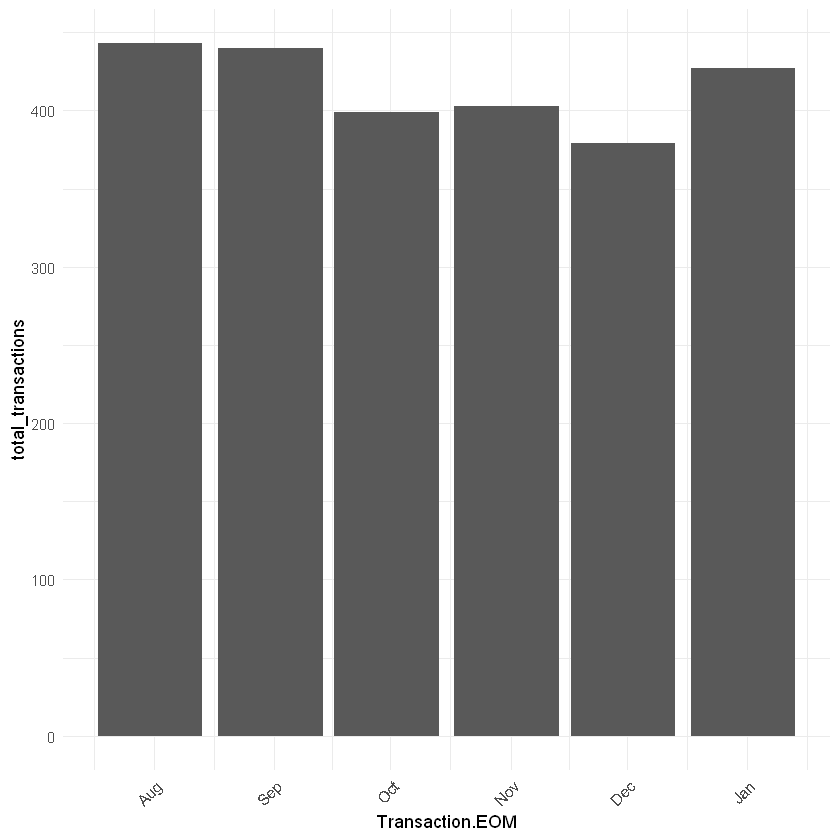

In [80]:
# plot count
a_ts %>% 
    ggplot(aes(x = Transaction.EOM, y = total_transactions)) +
    geom_bar(stat = "identity") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

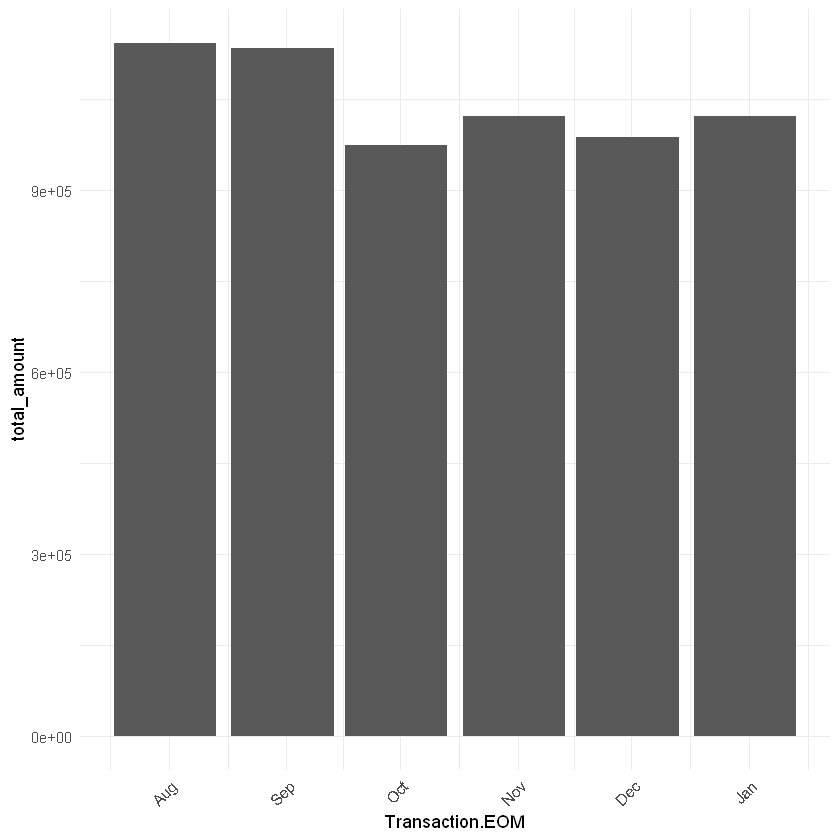

In [ ]:
# plot volume
a_ts %>% 
    ggplot(aes(x = Transaction.EOM, y = total_amount)) +
    geom_bar(stat = "identity") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

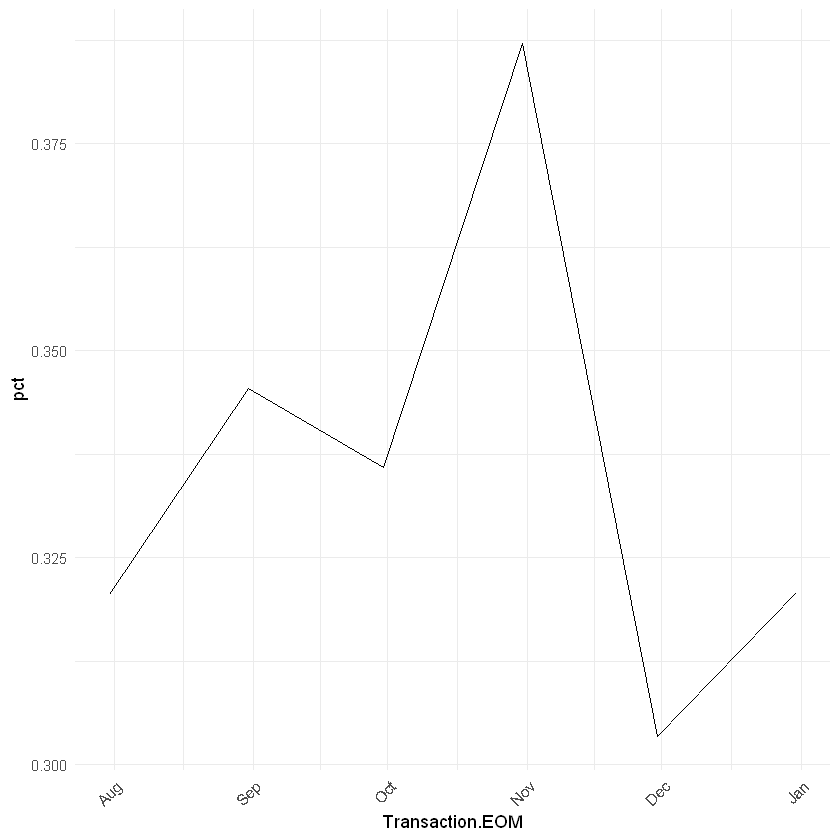

In [ ]:
# plot rate 
a_ts %>% 
    ggplot(aes(x = Transaction.EOM, y = pct)) +
    geom_line() +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))